In [1]:
from MHW_daily_calcs import *
import matplotlib.pyplot as plt
import cmocean
import itertools

SEDI was higher, particularly for tropical Pacific, when no smoothing was applied. Try to identify cause. First, compare detrended anomaly time series.

In [2]:
climyrs=[1993,2023]
qtile=0.90
detr=True
#smoothClim=True
smoothTrend=True
meth=method
win=halfwin
qtvar='qt1'
delt=15
jj=60
p1=[215,216,80-60,81-60]

In [3]:
fanom=dict()
fMHW=dict()
fQ=dict()
pselect= lambda ds: ds.isel(lat=p1[2],lon=p1[0])
fanom['obs','sm','det']=xr.open_mfdataset([fnameOISSTAnomDetr([ylimlistobs[0][0],ylimlistobs[-1][-1]],climyrs, jj, smoothClim=True, meth=meth, win=win),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','sm','nod']=xr.open_mfdataset([fnameOISSTAnom(yrlims, climyrs, jj, smoothClim=True, meth=meth, win=win) for yrlims in ylimlistobs],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','id','det']=xr.open_mfdataset([fnameOISSTAnomDetr([ylimlistobs[0][0],ylimlistobs[-1][-1]],climyrs, jj, smoothClim=False, meth=None, win=1),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','id','nod']=xr.open_mfdataset([fnameOISSTAnom(yrlims, climyrs, jj, smoothClim=False, meth=None, win=1) for yrlims in ylimlistobs],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','sm','det']=xr.open_mfdataset([fnameCanESMAnomDetrByLead(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=True,
                                                        smoothTrend=True,meth=meth,win=win) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','sm','nod']=xr.open_mfdataset([fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=True,
                                                                       meth=meth,win=win) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','id','det']=xr.open_mfdataset([fnameCanESMAnomDetrByLead(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=False,
                                                        smoothTrend=False,meth=None,win=1) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','id','nod']=xr.open_mfdataset([fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=False,
                                                                       meth=None,win=1) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)


In [4]:

fMHW['obs','sm','det']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=True,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','sm','nod']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=False,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','id','det']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=True,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','id','nod']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=False,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
lmax=100
fMHW['mod','sm','det']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=True,smoothClim=True,
                                            smoothTrend=True,meth=meth,win=win,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','sm','nod']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=False,smoothClim=True,
                                            smoothTrend=True,meth=meth,win=win,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','id','det']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=True,smoothClim=False,
                                            smoothTrend=False,meth=None,win=1,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','id','nod']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=False,smoothClim=False,
                                            smoothTrend=False,meth=None,win=1,delt=delt,qtvar='qt1')  for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)

In [5]:
fQ['obs','sm','det']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=True,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','sm','nod']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=False,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','id','det']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=True,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','id','nod']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=False,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
lmax=100
fQ['mod','sm','det']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=True,smoothClim=True,
                                smoothTrend=True,meth=meth,win=win,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','sm','nod']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=False,smoothClim=True,
                                smoothTrend=True,meth=meth,win=win,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','id','det']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=True,smoothClim=False,
                                smoothTrend=False,meth=None,win=1,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','id','nod']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=False,smoothClim=False,
                                smoothTrend=False,meth=None,win=1,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)

In [6]:
sstan=dict()
mhw=dict()
Q=dict()
keylist=[('obs','sm','det'),
         ('obs','sm','nod'),
         ('obs','id','det'),
         ('obs','id','nod'),
         ('mod','sm','det'),
         ('mod','sm','nod'),
         ('mod','id','det'),
         ('mod','id','nod'),]
for key in keylist:
    print(key)
    sstan[key]=fanom[key].sst_an.load()
    mhw[key]=fMHW[key].MHW_prob.load() if key[0]=='mod' else fMHW[key].isMHW.load()
    Q[key]=fQ[key].qt1.load()

('obs', 'sm', 'det')
('obs', 'sm', 'nod')
('obs', 'id', 'det')
('obs', 'id', 'nod')
('mod', 'sm', 'det')
('mod', 'sm', 'nod')
('mod', 'id', 'det')
('mod', 'id', 'nod')


In [37]:
fanom['obs','sm','det'].time
tobs=np.array([dt.datetime(1978,1,1,12)+dt.timedelta(days=float(ii)) for ii in fanom['obs','sm','det'].time.values])
ydobs=np.array([yd365(el) for el in tobs]) # day 366 is returned as 365

(np.float64(8401.0), np.float64(19783.0))

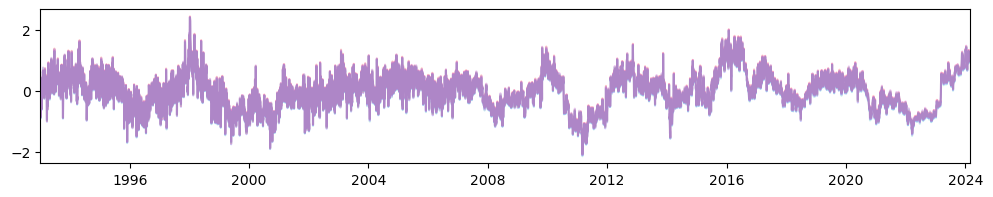

In [8]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(2024,3,1))

(np.float64(8401.0), np.float64(19783.0))

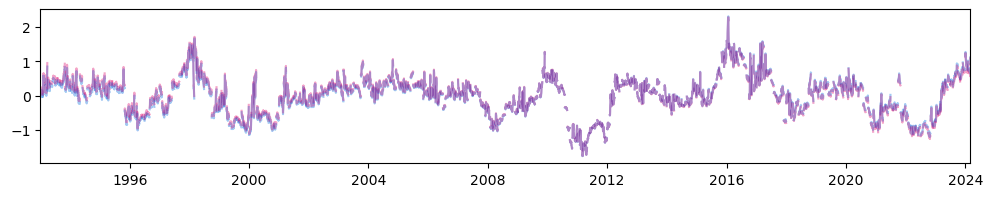

In [9]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(2024,3,1))

(-1.1, 1.5)

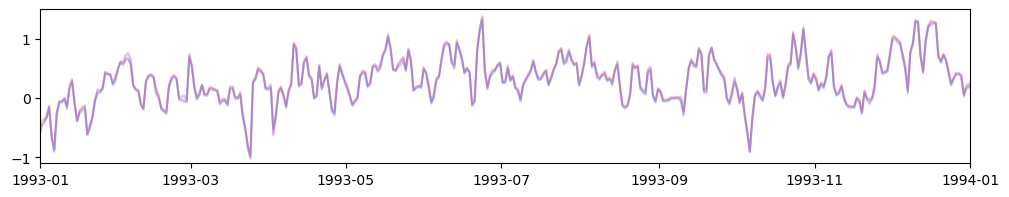

In [10]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(1994,1,1))
ax.set_ylim(-1.1,1.5)

(-1.1, 1.5)

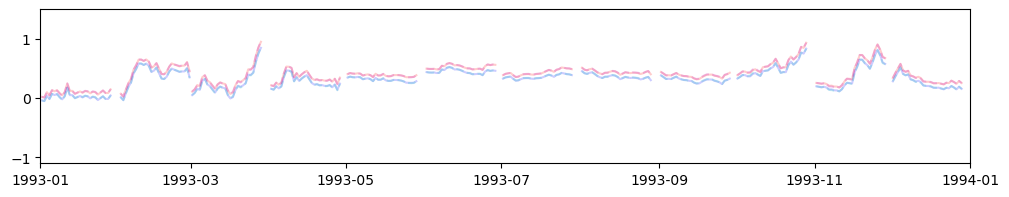

In [11]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(1994,1,1))
ax.set_ylim(-1.1,1.5)

(-1.0, 1.3)

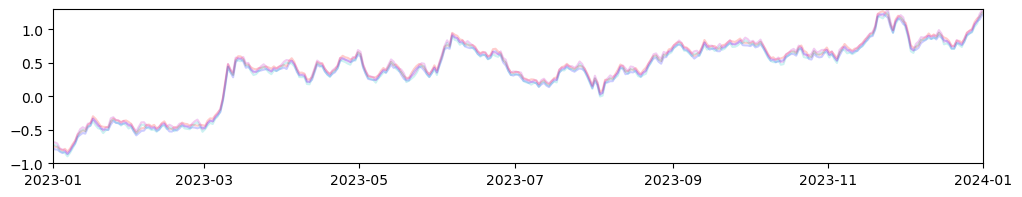

In [12]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(dt.datetime(2023,1,1),dt.datetime(2024,1,1))
ax.set_ylim(-1,1.3)

(-1.0, 1.3)

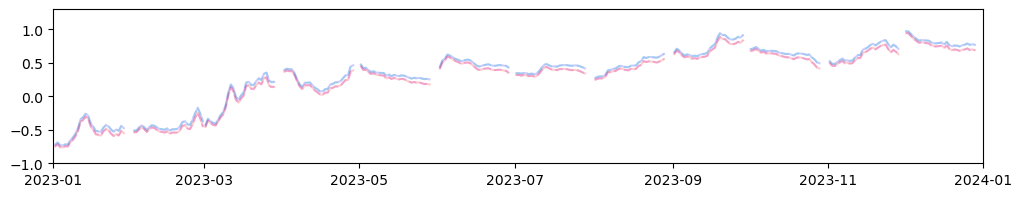

In [13]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(dt.datetime(2023,1,1),dt.datetime(2024,1,1))
ax.set_ylim(-1,1.3)


MHW


(np.float64(8401.0), np.float64(19783.0))

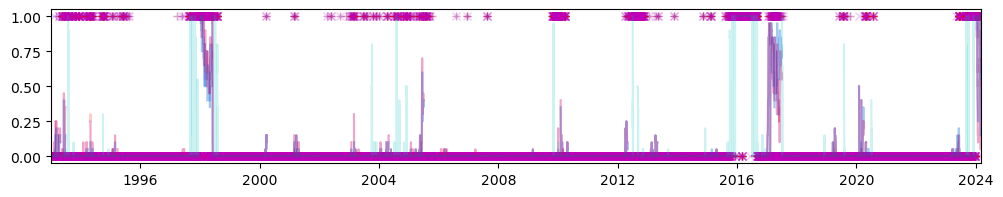

In [14]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det'],'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod'],'r+',alpha=.2)
#ax.plot(tobs,mhw['obs','id','det'],'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod'],'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(2024,3,1))

/tmp/reo000/3207243/ipykernel_3365882/2219761213.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(1,1,figsize=(12,2))


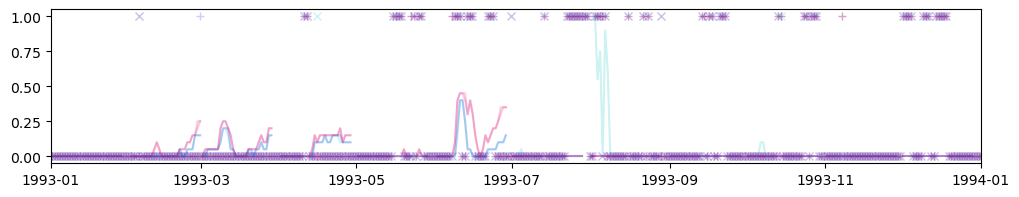

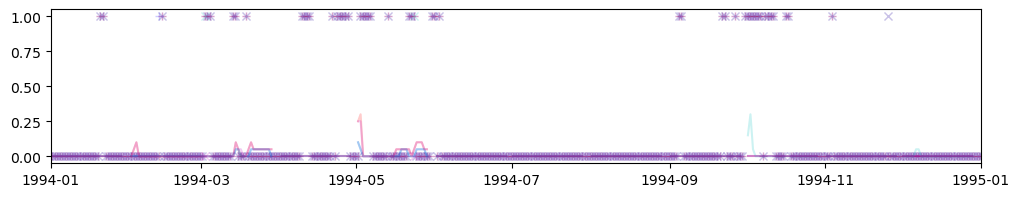

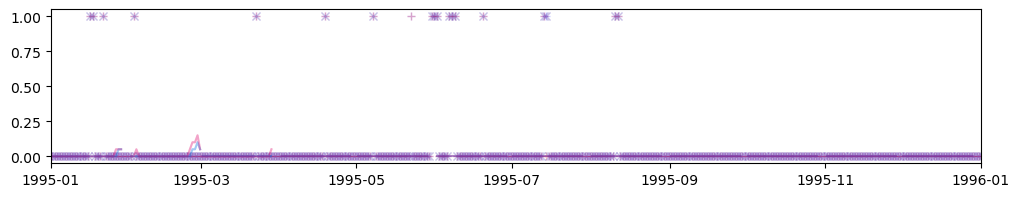

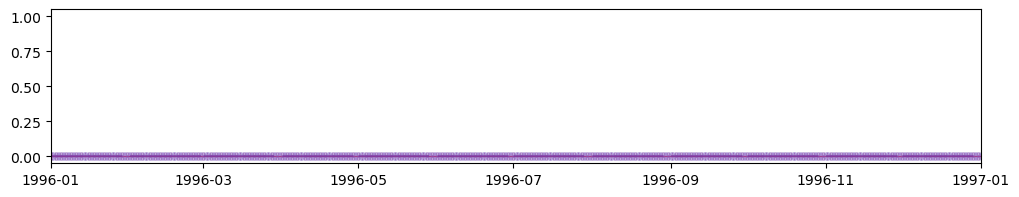

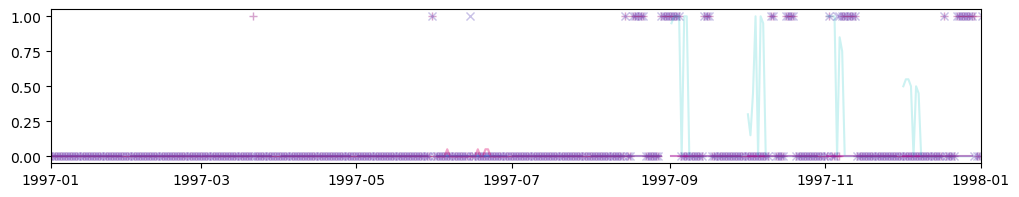

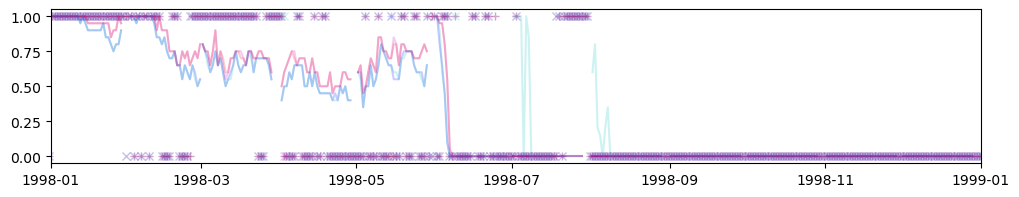

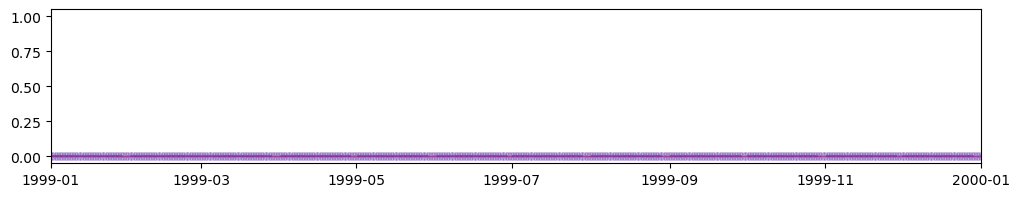

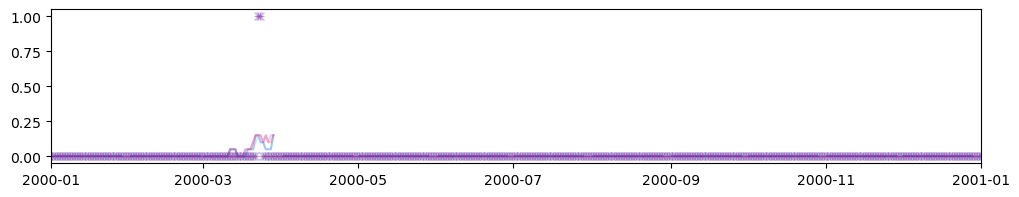

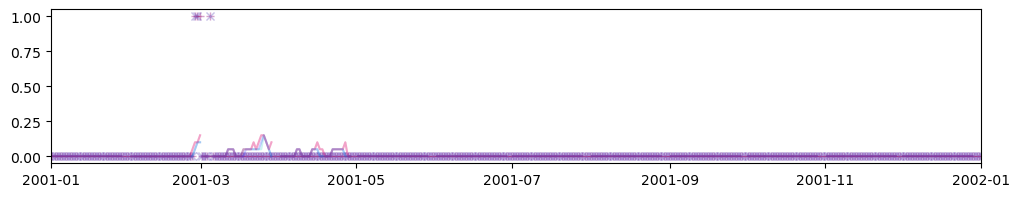

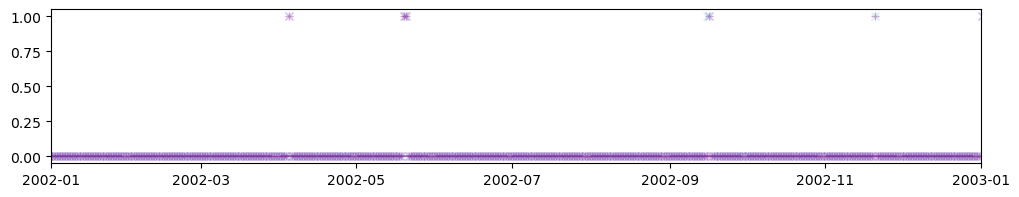

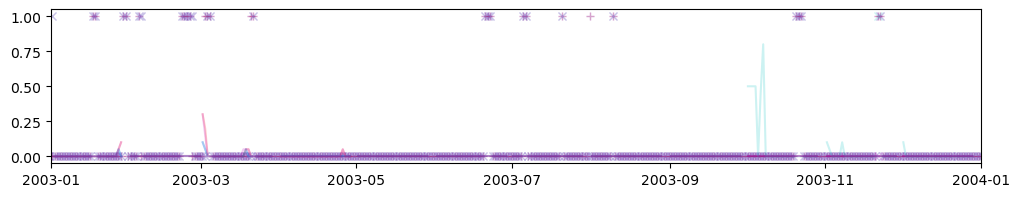

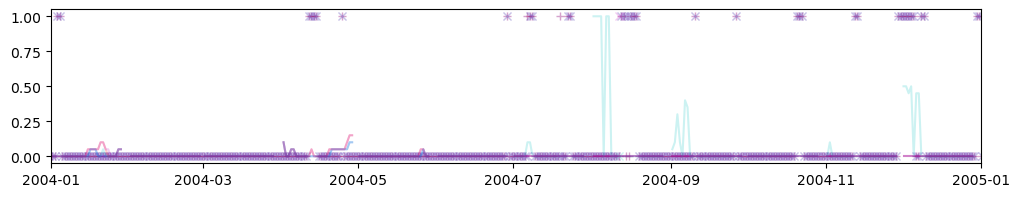

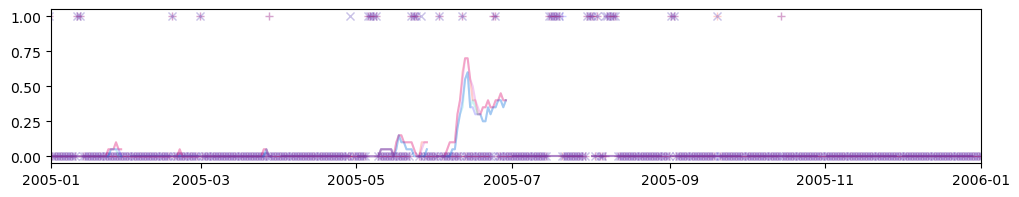

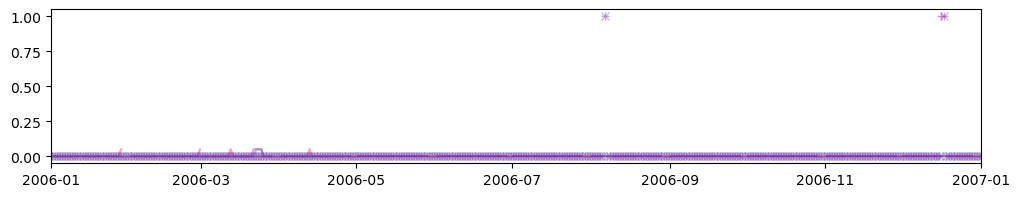

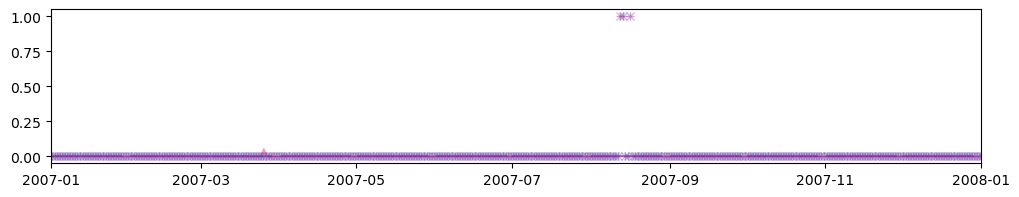

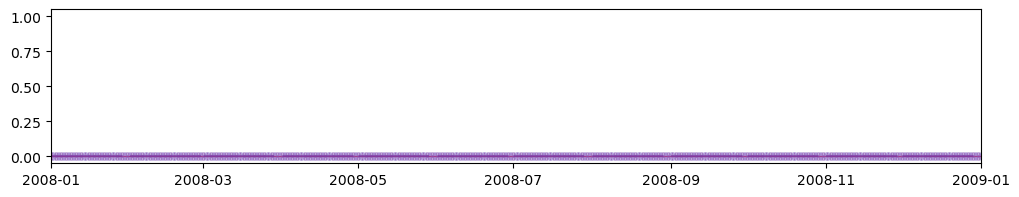

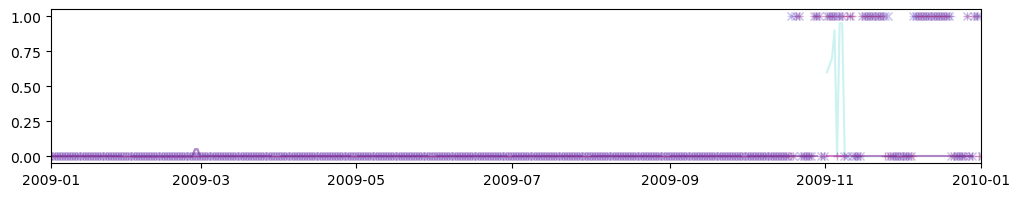

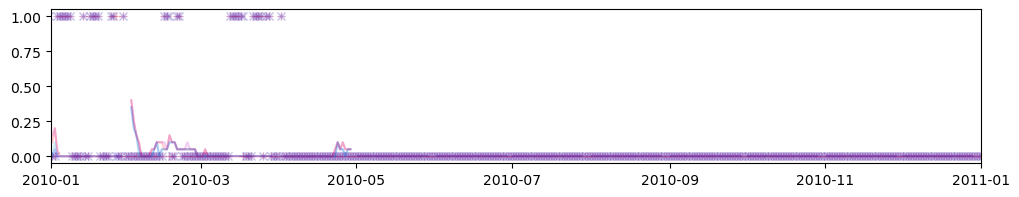

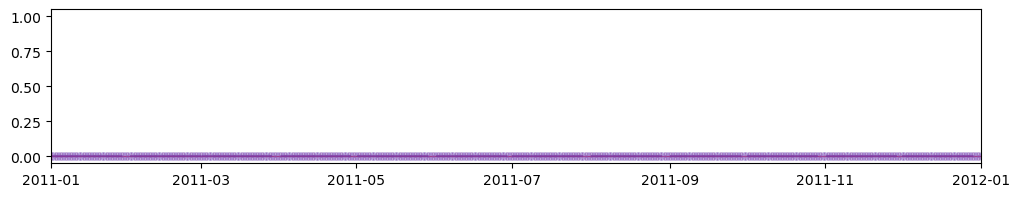

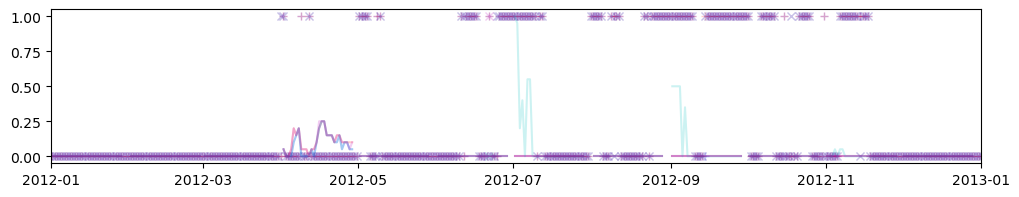

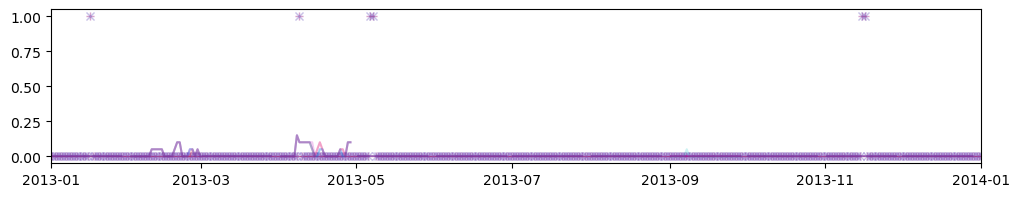

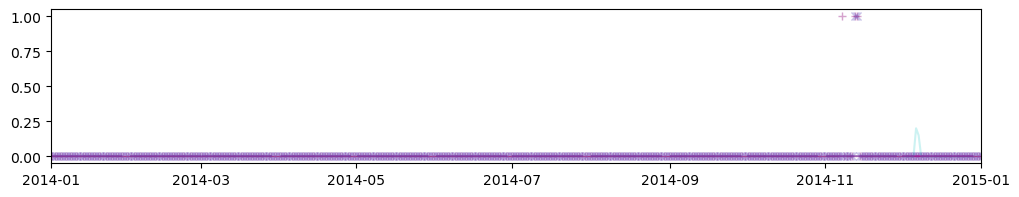

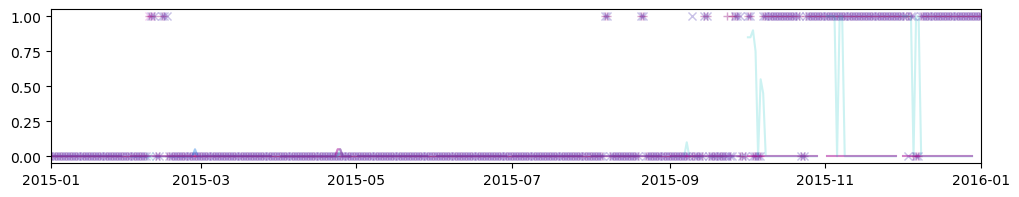

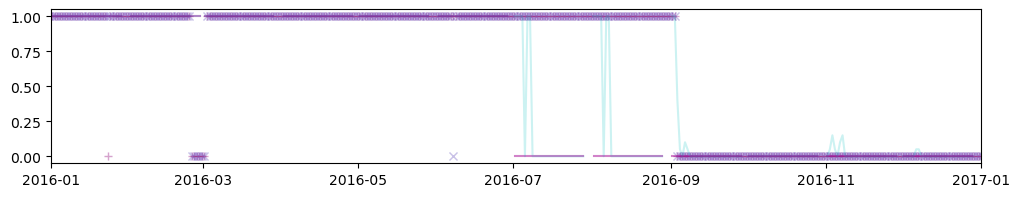

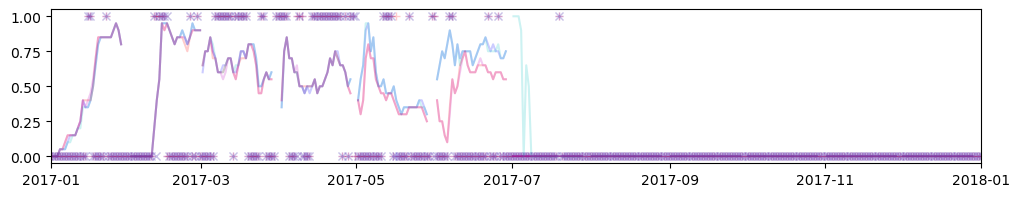

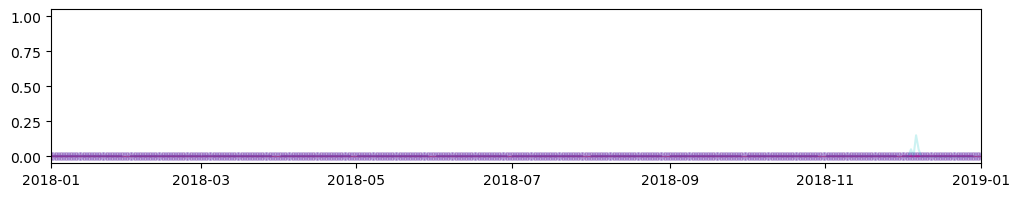

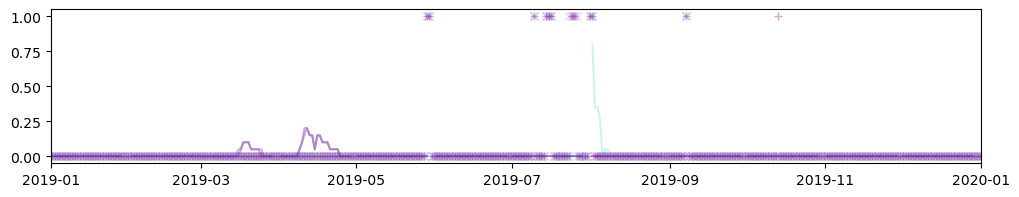

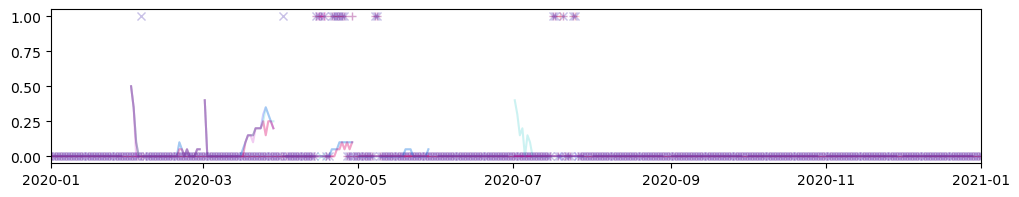

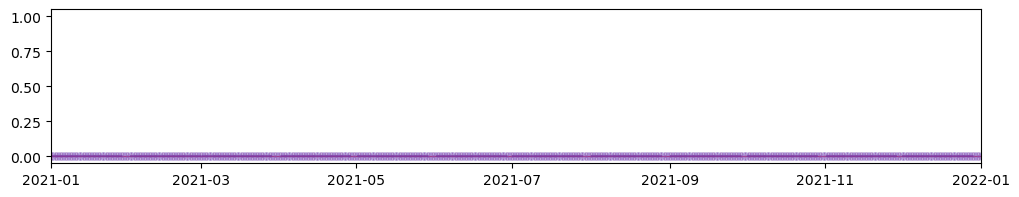

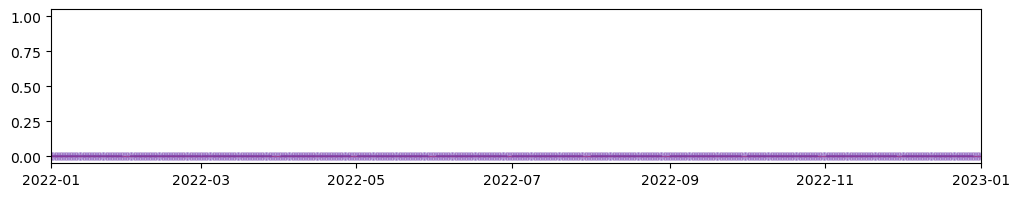

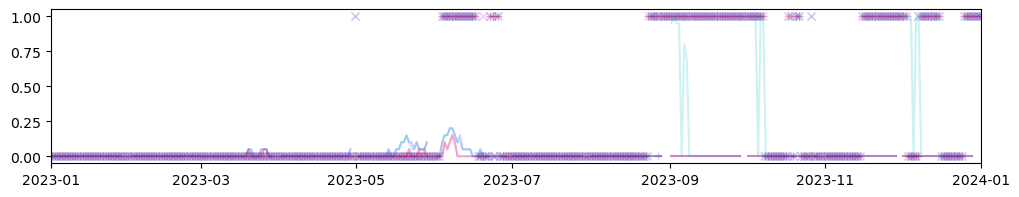

In [15]:
for yr0 in range(1993,2024):
    fig,ax=plt.subplots(1,1,figsize=(12,2))
    ax.plot(tobs,mhw['obs','sm','det'],'b+',alpha=.2)
    ax.plot(tobs,mhw['obs','sm','nod'],'r+',alpha=.2)
    ax.plot(tobs,mhw['obs','id','det'],'cx',alpha=.2)
    ax.plot(tobs,mhw['obs','id','nod'],'mx',alpha=.2)
    for ir in range(0,378):
        tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
        tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
        ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
        ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
        ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
        ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
    ax.set_xlim(dt.datetime(yr0,1,1),dt.datetime(yr0+1,1,1))

Text(0.5, 1.0, 'Mod SST_an')

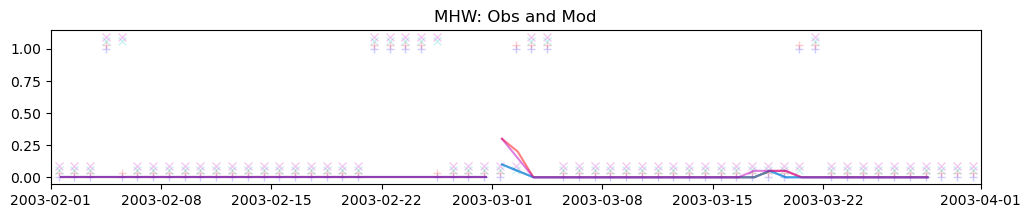

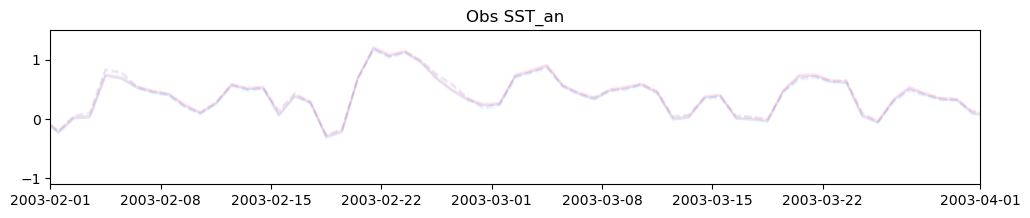

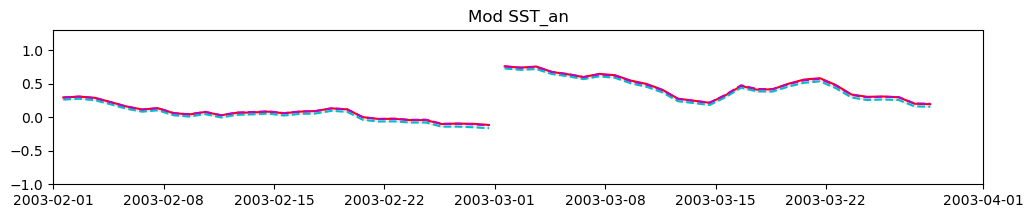

In [16]:
xl=[dt.datetime(2003,2,1),dt.datetime(2003,4,1)]
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod']+0.03,'r+',alpha=.2)
ax.plot(tobs,mhw['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod']+0.09,'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.5)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.5)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.5)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.5)
ax.set_xlim(xl)
ax.set_title('MHW: Obs and Mod')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.1)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.1)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c--',alpha=.1)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m--',alpha=.1)
ax.set_xlim(xl)
ax.set_ylim(-1.1,1.5)
ax.set_title('Obs SST_an')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.1)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=1)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=1)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=1)
ax.set_xlim(xl)
ax.set_ylim(-1,1.3)
ax.set_title('Mod SST_an')

Text(0.5, 1.0, 'Mod SST_an')

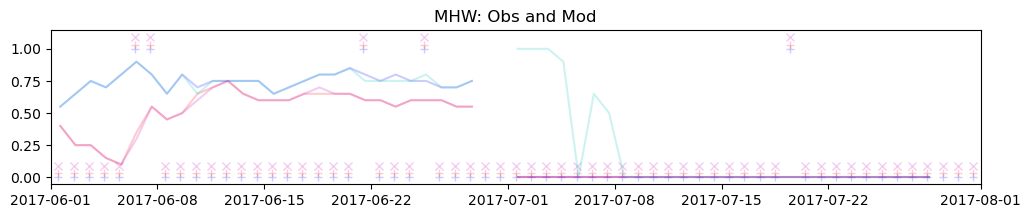

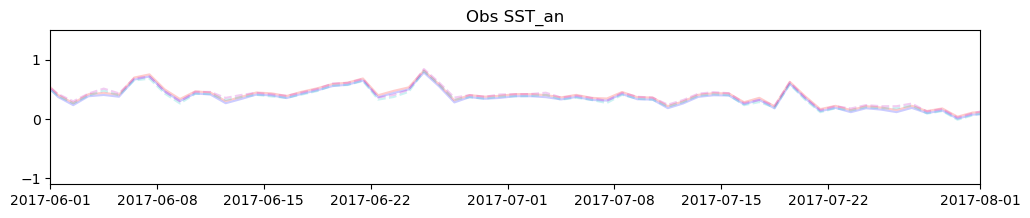

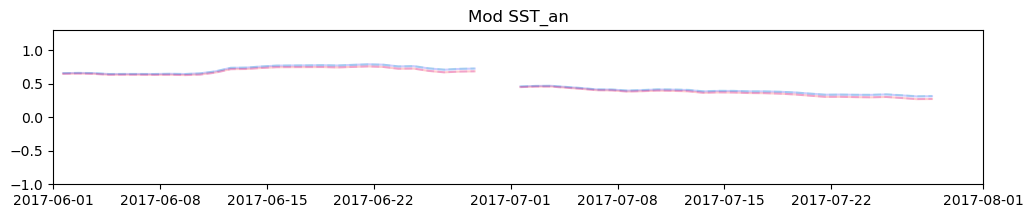

In [17]:
xl=[dt.datetime(2017,6,1),dt.datetime(2017,8,1)]
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod']+0.03,'r+',alpha=.2)
#ax.plot(tobs,mhw['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod']+0.09,'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
ax.set_xlim(xl)
ax.set_title('MHW: Obs and Mod')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c--',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m--',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1.1,1.5)
ax.set_title('Obs SST_an')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1,1.3)
ax.set_title('Mod SST_an')

Text(0.5, 1.0, 'Mod SST_an')

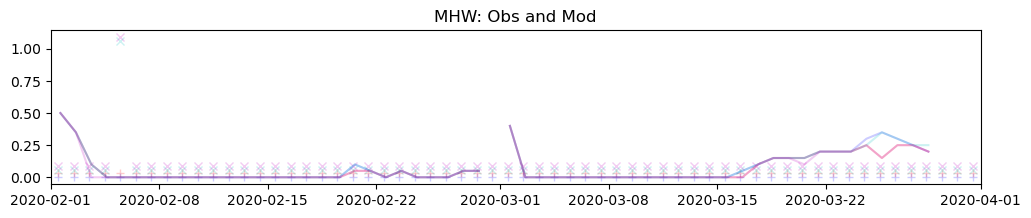

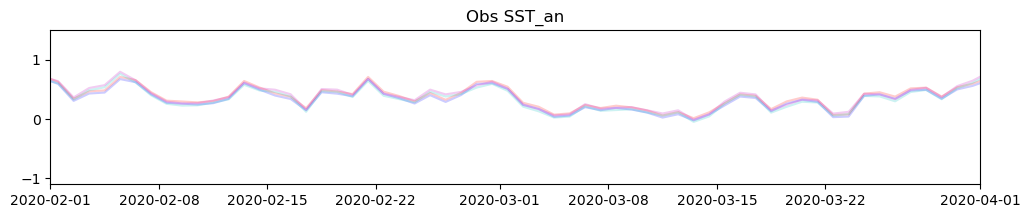

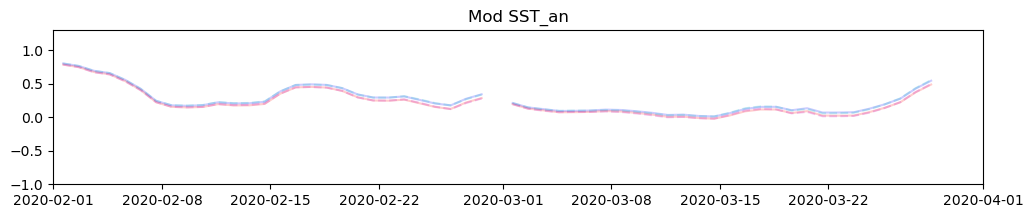

In [18]:
xl=[dt.datetime(2020,2,1),dt.datetime(2020,4,1)]
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod']+0.03,'r+',alpha=.2)
ax.plot(tobs,mhw['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod']+0.09,'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
ax.set_xlim(xl)
ax.set_title('MHW: Obs and Mod')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1.1,1.5)
ax.set_title('Obs SST_an')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1,1.3)
ax.set_title('Mod SST_an')

calculate SEDI from MHW data sets for each case

## lead 0

In [19]:
# lead 0
np.shape(mhw[('mod','sm','det')])

(100, 378)

In [20]:
tmod_L0=dt.datetime(1993,1,1,0)+np.array([dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].reftime.values])+\
    dt.timedelta(days=float(fanom['mod','sm','nod'].leadtime.values[0]/24))
tmod_L0[0],tmod_L0[-1]

(datetime.datetime(1993, 1, 1, 15, 0), datetime.datetime(2024, 6, 1, 15, 0))

In [21]:
indobs=np.array([True if (el.year>=1993 and (el.year<2024 or (el.year==2024 and el.month<=6)) and el.day==1) else False for el in tobs])

In [22]:
tobs_L0=tobs[indobs]
tobs_L0[0],tobs_L0[-1]

(datetime.datetime(1993, 1, 1, 12, 0), datetime.datetime(2024, 6, 1, 12, 0))

In [23]:
mhw_L0=dict()
mhw_L0[('obs','sm','det')]=mhw[('obs','sm','det')][indobs]
mhw_L0[('obs','sm','nod')]=mhw[('obs','sm','nod')][indobs]
mhw_L0[('obs','id','det')]=mhw[('obs','id','det')][indobs]
mhw_L0[('obs','id','nod')]=mhw[('obs','id','nod')][indobs]

mhw_L0[('mod','sm','det')]=mhw[('mod','sm','det')][0,:]
mhw_L0[('mod','sm','nod')]=mhw[('mod','sm','nod')][0,:]
mhw_L0[('mod','id','det')]=mhw[('mod','id','det')][0,:]
mhw_L0[('mod','id','nod')]=mhw[('mod','id','nod')][0,:]

In [24]:
an_L0=dict()
an_L0[('obs','sm','det')]=sstan[('obs','sm','det')][indobs]
an_L0[('obs','sm','nod')]=sstan[('obs','sm','nod')][indobs]
an_L0[('obs','id','det')]=sstan[('obs','id','det')][indobs]
an_L0[('obs','id','nod')]=sstan[('obs','id','nod')][indobs]

an_L0[('mod','sm','det')]=sstan[('mod','sm','det')][0,:]
an_L0[('mod','sm','nod')]=sstan[('mod','sm','nod')][0,:]
an_L0[('mod','id','det')]=sstan[('mod','id','det')][0,:]
an_L0[('mod','id','nod')]=sstan[('mod','id','nod')][0,:]

In [41]:
Q[('mod','sm','det')][0,:].values

array([0.68401031, 0.76672894, 0.77839594, 0.70842649, 0.65284323,
       0.63492288,        nan,        nan,        nan,        nan,
              nan,        nan])

In [42]:
Q[('mod','sm','nod')][0,:].values

array([0.67718702, 0.75034872, 0.7688325 , 0.69254608, 0.6655147 ,
       0.64252046,        nan,        nan,        nan,        nan,
              nan,        nan])

In [43]:
Q[('mod','id','det')][0,:].values

array([0.68297743, 0.76791009, 0.77499155, 0.70675561, 0.65368557,
       0.63473756, 0.42272852, 0.41170614, 0.54910214, 0.65043726,
       0.66288646, 0.76920596])

In [44]:
Q[('mod','id','nod')][0,:].values

array([0.67244205, 0.75135705, 0.76917623, 0.69069157, 0.66645139,
       0.64253168,        nan,        nan,        nan,        nan,
              nan,        nan])

In [38]:
Q_L0=dict()
ydo_0=ydobs[indobs]
Q_L0[('obs','sm','det')]=np.array([Q[('obs','sm','det')][iyd] for iyd in ydo_0])
Q_L0[('obs','sm','nod')]=np.array([Q[('obs','sm','nod')][iyd] for iyd in ydo_0])
Q_L0[('obs','id','det')]=np.array([Q[('obs','id','det')][iyd] for iyd in ydo_0])
Q_L0[('obs','id','nod')]=np.array([Q[('obs','id','nod')][iyd] for iyd in ydo_0])

Q_L0[('mod','sm','det')]=Q[('mod','sm','det')][0,:]
Q_L0[('mod','sm','nod')]=Q[('mod','sm','nod')][0,:]
Q_L0[('mod','id','det')]=Q[('mod','id','det')][0,:]
Q_L0[('mod','id','nod')]=Q[('mod','id','nod')][0,:]

Text(0.5, 1.0, 'MHW: Obs and Mod')

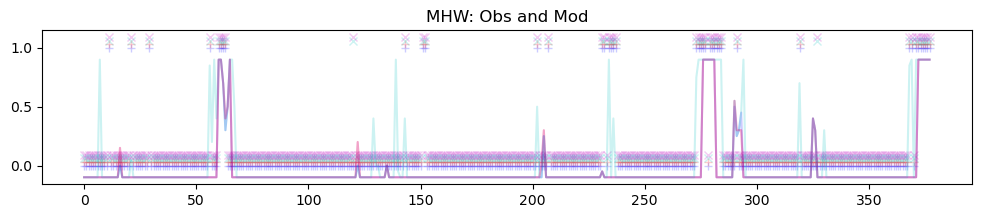

In [25]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(mhw_L0['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(mhw_L0['obs','sm','nod']+0.03,'r+',alpha=.2)
ax.plot(mhw_L0['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(mhw_L0['obs','id','nod']+0.09,'mx',alpha=.2)
###
ax.plot(mhw_L0['mod','sm','det']-.1,'b-',alpha=.2)
ax.plot(mhw_L0['mod','sm','nod']-.1,'r-',alpha=.2)
ax.plot(mhw_L0['mod','id','det']-.1,'c-',alpha=.2)
ax.plot(mhw_L0['mod','id','nod']-.1,'m-',alpha=.2)
ax.set_title('MHW: Obs and Mod')

Text(0.5, 1.0, 'SST An: Obs and Mod')

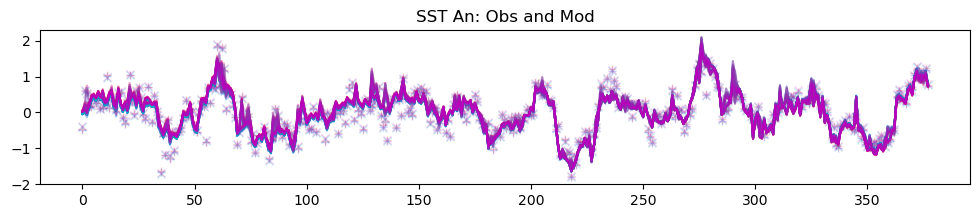

In [32]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(an_L0['obs','sm','det'],'b+',alpha=.2)
ax.plot(an_L0['obs','sm','nod'],'r+',alpha=.2)
ax.plot(an_L0['obs','id','det'],'cx',alpha=.2)
ax.plot(an_L0['obs','id','nod'],'mx',alpha=.2)
###
ax.plot(an_L0['mod','sm','det'],'b-',alpha=.2)
ax.plot(an_L0['mod','sm','nod'],'r-',alpha=.2)
ax.plot(an_L0['mod','id','det'],'c-',alpha=.2)
ax.plot(an_L0['mod','id','nod'],'m-',alpha=.2)
ax.set_title('SST An: Obs and Mod')

Text(0.5, 1.0, 'SST An: Obs and Mod')

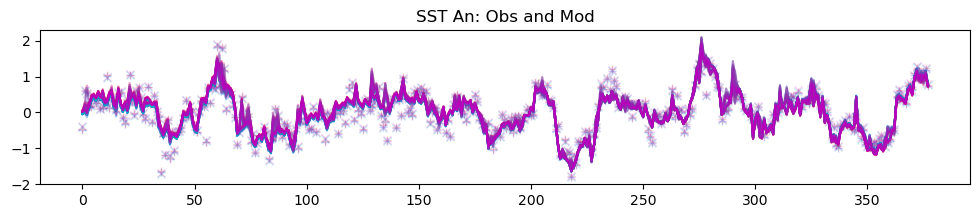

In [32]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(an_L0['obs','sm','det'],'b+',alpha=.2)
ax.plot(an_L0['obs','sm','nod'],'r+',alpha=.2)
ax.plot(an_L0['obs','id','det'],'cx',alpha=.2)
ax.plot(an_L0['obs','id','nod'],'mx',alpha=.2)
###
ax.plot(an_L0['mod','sm','det'],'b-',alpha=.2)
ax.plot(an_L0['mod','sm','nod'],'r-',alpha=.2)
ax.plot(an_L0['mod','id','det'],'c-',alpha=.2)
ax.plot(an_L0['mod','id','nod'],'m-',alpha=.2)
ax.set_title('SST An: Obs and Mod')

In [27]:
def calc_SEDI(mhwfor,mhwobs):
    M=20
    N_pos=20*mhwfor
    N_neg=20-N_pos
    TP=np.where(mhwobs==1,N_pos,0).sum()
    TN=np.where(mhwobs==0,N_neg,0).sum()
    FP=np.where(mhwobs==0,N_pos,0).sum()
    FN=np.where(mhwobs==1,N_neg,0).sum()
    # calculate SEDI, summed over time
    Nobs_pos=np.sum(mhwobs,axis=0)
    Nobs_neg=np.sum(1-mhwobs,axis=0)
    F=FP/(Nobs_neg*M)
    H=TP/(Nobs_pos*M)
    SEDI=(np.log(F)-np.log(H)-np.log(1-F)+np.log(1-H))/(np.log(F)+np.log(H)+np.log(1-F)+np.log(1-H))
    return SEDI,TP,TN,FP,FN

In [28]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','sm','det')],mhw_L0[('obs','sm','det')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.62  TP: 292.0  TN: 6626.0  FP: 292.0 FN: 528.0


In [29]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','sm','nod')],mhw_L0[('obs','sm','nod')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.62  TP: 295.0  TN: 6618.0  FP: 295.0 FN: 525.0


In [30]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','id','det')],mhw_L0[('obs','id','det')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.80  TP: 558.0  TN: 6434.0  FP: 558.0 FN: 302.0


In [31]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','id','nod')],mhw_L0[('obs','id','nod')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.60  TP: 295.0  TN: 6577.0  FP: 295.0 FN: 565.0
